In [1]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/figures/mean_representational_distance/lda_3/'
figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/mean_representational_distance/lda_3/non_nan/'


In [4]:
file_2 = 'prob_product_overlapping.npy'
file_1 = 'cumulative_exp_time_sum_overlapping.npy'
file_3 = 'neural_overlapping.npy'
exp_time_overlapping = np.load(input_directory + file_1)
prob_overlapping = np.load(input_directory + file_2)
neural = np.load(input_directory + file_3, allow_pickle=True)
correlation_overlapping = np.zeros((20,))
correlation_overlapping1 = np.zeros((20,))
correlation_overlapping2 = np.zeros((20,))
for i in range(20):
    x = np.concatenate((exp_time_overlapping[0][:,i],exp_time_overlapping[1][:,i],exp_time_overlapping[2][:,i],exp_time_overlapping[3][:,i]))
    y = np.concatenate((prob_overlapping[0][:,i],prob_overlapping[1][:,i],prob_overlapping[2][:,i],prob_overlapping[3][:,i]))
    a = np.mean(neural[2][:,i].reshape(2,5),axis = 0)
    b = np.mean(neural[3][:,i].reshape(2,5),axis = 0)
    z = np.concatenate((neural[0][:,i],neural[1][:,i],a,b))
    corr = np.corrcoef(x,y)
    corr1 = np.corrcoef(x,z)
    corr2 = np.corrcoef(y,z)
    if np.isnan(corr[0,1]) == False and np.isnan(corr1[0,1]) == False and np.isnan(corr2[0,1]) == False :
        correlation_overlapping[i] = corr[0,1]
        correlation_overlapping1[i] = corr1[0,1]
        correlation_overlapping2[i] = corr2[0,1]
     
file_2 = 'prob_product__random.npy'
file_1 = 'cumulative_exp_time_sum_random.npy'  
file_3 = 'neural_random.npy'
exp_time_overlapping = np.load(input_directory + file_1)
prob_overlapping = np.load(input_directory + file_2)
neural = np.load(input_directory + file_3, allow_pickle=True)
correlation_random = np.zeros((20,))
correlation_random1 = np.zeros((20,))
correlation_random2 = np.zeros((20,))
for i in range(20):
    x = np.concatenate((exp_time_overlapping[0][:,i],exp_time_overlapping[1][:,i],exp_time_overlapping[2][:,i]))
    y = np.concatenate((prob_overlapping[0][:,i],prob_overlapping[1][:,i],prob_overlapping[2][:,i]))
    a = np.mean(neural[2][:,i].reshape(4,5),axis = 0)
    z = np.concatenate((neural[0][:,i],neural[1][:,i],a))
    corr = np.corrcoef(x,y)
    corr1 = np.corrcoef(x,z)
    corr2 = np.corrcoef(y,z)
    if np.isnan(corr[0,1]) == False and np.isnan(corr1[0,1]) == False and np.isnan(corr2[0,1]) == False :
        correlation_random[i] = corr[0,1]
        correlation_random1[i] = corr1[0,1]
        correlation_random2[i] = corr2[0,1]
        
file_2 = 'prob_product__stable.npy'
file_1 = 'cumulative_exp_time_sum_stable.npy' 
file_3 = 'neural_stable.npy'
exp_time_overlapping = np.load(input_directory + file_1)
prob_overlapping = np.load(input_directory + file_2)
neural = np.load(input_directory + file_3, allow_pickle=True)
correlation_stable = np.zeros((20,))
correlation_stable1 = np.zeros((20,))
correlation_stable2 = np.zeros((20,))

for i in range(20):
    x = np.concatenate((exp_time_overlapping[0][[0,2,3,4],i],exp_time_overlapping[1][[0,2,3,4],i],exp_time_overlapping[2][[0,2,3,4],i]))
    y = np.concatenate((prob_overlapping[0][:,i],prob_overlapping[1][:,i],prob_overlapping[2][:,i]))
    a = np.mean(neural[2][:,i].reshape(4,4),axis = 0)
    z = np.concatenate((neural[0][:,i],neural[1][:,i],a))
    corr = np.corrcoef(x,y)
    corr1 = np.corrcoef(x,z)
    corr2 = np.corrcoef(y,z)
    if np.isnan(corr[0,1]) == False and np.isnan(corr1[0,1]) == False and np.isnan(corr2[0,1]) == False :
        correlation_stable[i] = corr[0,1]
        correlation_stable1[i] = corr1[0,1]
        correlation_stable2[i] = corr2[0,1]

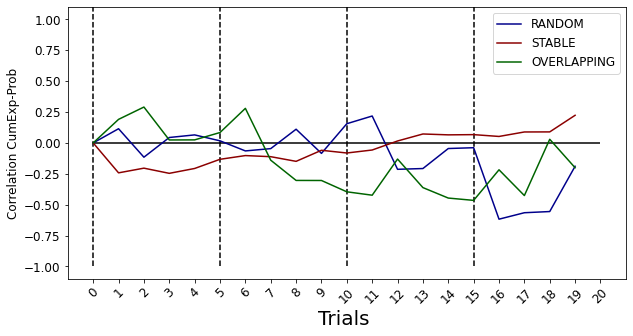

In [5]:
random_mean_occ= correlation_random
stable_mean_occ = correlation_stable
overlapping_mean_occ = correlation_overlapping


figure, axes = plt.subplots()

time = np.arange(0,20)
axes.plot(time,random_mean_occ[time],'darkblue')
axes.plot(time,stable_mean_occ[time],'darkred')
axes.plot(time,overlapping_mean_occ[time],'darkgreen')

axes.set_ylim([-1.1,1.1])
axes.set_ylabel('Correlation CumExp-Prob',fontsize = 12)
axes.tick_params(axis='x', labelsize=12)
axes.set_xticks(np.arange(0,21))

axes.tick_params(axis='y', labelsize=12)  
for tick in axes.get_xticklabels():
    tick.set_rotation(45)
axes.hlines(0,0,20,color = 'k')  
axes.legend(['RANDOM','STABLE','OVERLAPPING'], fontsize = 12)
axes.vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes.set_xlabel('Trials ',fontsize = 20)

figure.set_size_inches([10,5])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_mix_category.png')

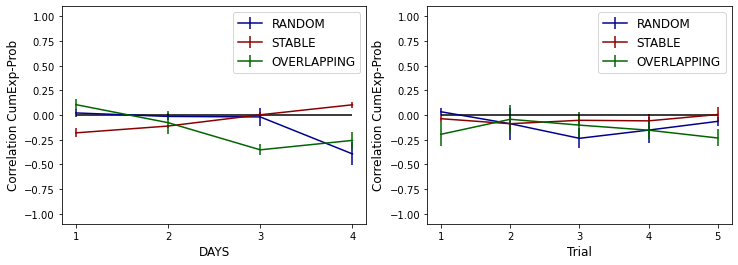

In [20]:
random = correlation_random.reshape(4,5)
stable = correlation_stable.reshape(4,5)
overlapping = correlation_overlapping.reshape(4,5)

figure, axes = plt.subplots(1,2)
color_random = ['darkblue','blue','royalblue']
color_stable = ['darkred','red','tomato']
color_overlapping = ['darkgreen','limegreen','y','cyan']

trials = np.arange(0,5)
axes[1].errorbar(trials,np.nanmean(random,axis = 0),np.nanstd(random,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0])
axes[1].errorbar(trials,np.nanmean(stable,axis = 0),np.nanstd(stable,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1].errorbar(trials,np.nanmean(overlapping,axis = 0),np.nanstd(overlapping,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

trials = np.arange(0,4)
axes[0].errorbar(trials,np.nanmean(random,axis = 1),np.nanstd(random,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0].errorbar(trials,np.nanmean(stable,axis = 1),np.nanstd(stable,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[0].errorbar(trials,np.nanmean(overlapping,axis = 1),np.nanstd(overlapping,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

for j in range(2):
    axes[j].set_ylim([-1.1,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

titles = ['RANDOM','STABLE','OVERLAPPING']
axes[1].set_xticks(trials_comparison_pos)
axes[1].set_xlabel('Trial', fontsize = 12)
axes[1].set_ylabel('Correlation CumExp-Prob', fontsize = 12)
axes[1].set_xticklabels(tick_label)
axes[1].legend(titles,fontsize= 12)
axes[1].hlines(0,0,4,color = 'k')  

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
axes[0].set_xticks(trials_comparison_pos)
axes[0].set_xlabel('DAYS', fontsize = 12)
axes[0].set_ylabel('Correlation CumExp-Prob', fontsize = 12)
axes[0].set_xticklabels(tick_label)
axes[0].legend(titles,fontsize= 12)
axes[0].hlines(0,0,3,color = 'k')  

figure.set_size_inches([12,4])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_mix_category2.png')

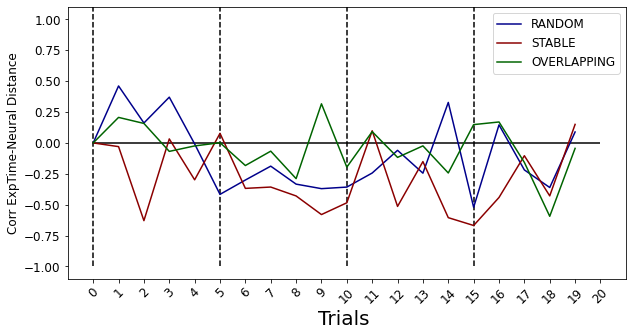

In [22]:
random_mean_occ1= correlation_random1
stable_mean_occ1 = correlation_stable1
overlapping_mean_occ1 = correlation_overlapping1

figure, axes = plt.subplots()

time = np.arange(0,20)
axes.plot(time,random_mean_occ1[time],'darkblue')
axes.plot(time,stable_mean_occ1[time],'darkred')
axes.plot(time,overlapping_mean_occ1[time],'darkgreen')

axes.set_ylim([-1.1,1.1])
axes.set_ylabel('Corr ExpTime-Neural Distance',fontsize = 12)
axes.tick_params(axis='x', labelsize=12)
axes.set_xticks(np.arange(0,21))

axes.tick_params(axis='y', labelsize=12)  
for tick in axes.get_xticklabels():
    tick.set_rotation(45)
axes.hlines(0,0,20,color = 'k')  
axes.legend(['RANDOM','STABLE','OVERLAPPING'], fontsize = 12)
axes.vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes.set_xlabel('Trials ',fontsize = 20)

figure.set_size_inches([10,5])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_exp_time_neural_mix_category.png')

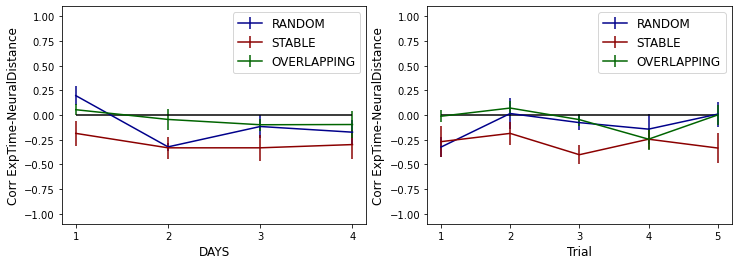

In [44]:
random1 = correlation_random1.reshape(4,5)
stable1 = correlation_stable1.reshape(4,5)
overlapping1 = correlation_overlapping1.reshape(4,5)

figure, axes = plt.subplots(1,2)
color_random = ['darkblue','blue','royalblue']
color_stable = ['darkred','red','tomato']
color_overlapping = ['darkgreen','limegreen','y','cyan']

trials = np.arange(0,5)
axes[1].errorbar(trials,np.nanmean(random1,axis = 0),np.nanstd(random1,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0])
axes[1].errorbar(trials,np.nanmean(stable1,axis = 0),np.nanstd(stable1,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1].errorbar(trials,np.nanmean(overlapping1,axis = 0),np.nanstd(overlapping1,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

trials = np.arange(0,4)
axes[0].errorbar(trials,np.nanmean(random1,axis = 1),np.nanstd(random1,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0].errorbar(trials,np.nanmean(stable1,axis = 1),np.nanstd(stable1,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[0].errorbar(trials,np.nanmean(overlapping1,axis = 1),np.nanstd(overlapping1,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

for j in range(2):
    axes[j].set_ylim([-1.1,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

titles = ['RANDOM','STABLE','OVERLAPPING']
axes[1].set_xticks(trials_comparison_pos)
axes[1].set_xlabel('Trial', fontsize = 12)
axes[1].set_ylabel('Corr ExpTime-NeuralDistance', fontsize = 12)
axes[1].set_xticklabels(tick_label)
axes[1].legend(titles,fontsize= 12)
axes[1].hlines(0,0,4,color = 'k')  

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
axes[0].set_xticks(trials_comparison_pos)
axes[0].set_xlabel('DAYS', fontsize = 12)
axes[0].set_ylabel('Corr ExpTime-NeuralDistance', fontsize = 12)
axes[0].set_xticklabels(tick_label)
axes[0].legend(titles,fontsize= 12)
axes[0].hlines(0,0,3,color = 'k')  

figure.set_size_inches([12,4])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_exp_time_neural_category2.png')

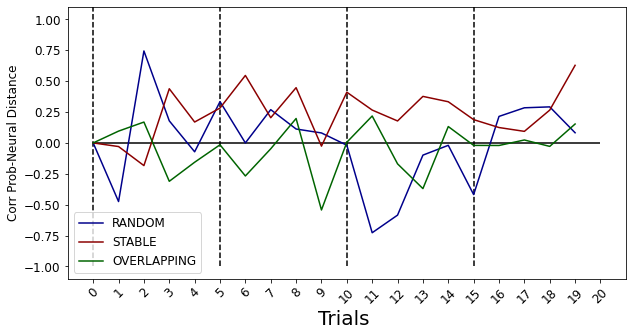

In [24]:
random_mean_occ2= correlation_random2
stable_mean_occ2 = correlation_stable2
overlapping_mean_occ2 = correlation_overlapping2

figure, axes = plt.subplots()

time = np.arange(0,20)
axes.plot(time,random_mean_occ2[time],'darkblue')
axes.plot(time,stable_mean_occ2[time],'darkred')
axes.plot(time,overlapping_mean_occ2[time],'darkgreen')

axes.set_ylim([-1.1,1.1])
axes.set_ylabel('Corr Prob-Neural Distance',fontsize = 12)
axes.tick_params(axis='x', labelsize=12)
axes.set_xticks(np.arange(0,21))

axes.tick_params(axis='y', labelsize=12)  
for tick in axes.get_xticklabels():
    tick.set_rotation(45)
axes.hlines(0,0,20,color = 'k')  
axes.legend(['RANDOM','STABLE','OVERLAPPING'], fontsize = 12)
axes.vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes.set_xlabel('Trials ',fontsize = 20)

figure.set_size_inches([10,5])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_probability_neural_mix_category.png')

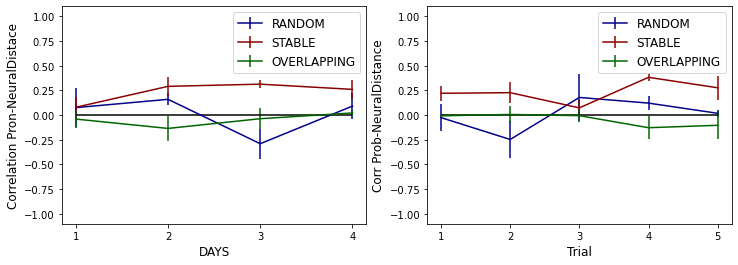

In [45]:
random2 = correlation_random2.reshape(4,5)
stable2 = correlation_stable2.reshape(4,5)
overlapping2 = correlation_overlapping2.reshape(4,5)

figure, axes = plt.subplots(1,2)
color_random = ['darkblue','blue','royalblue']
color_stable = ['darkred','red','tomato']
color_overlapping = ['darkgreen','limegreen','y','cyan']

trials = np.arange(0,5)
axes[1].errorbar(trials,np.nanmean(random2,axis = 0),np.nanstd(random2,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0])
axes[1].errorbar(trials,np.nanmean(stable2,axis = 0),np.nanstd(stable2,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1].errorbar(trials,np.nanmean(overlapping2,axis = 0),np.nanstd(overlapping2,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

trials = np.arange(0,4)
axes[0].errorbar(trials,np.nanmean(random2,axis = 1),np.nanstd(random2,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0].errorbar(trials,np.nanmean(stable2,axis = 1),np.nanstd(stable2,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[0].errorbar(trials,np.nanmean(overlapping2,axis = 1),np.nanstd(overlapping2,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])

for j in range(2):
    axes[j].set_ylim([-1.1,1.1])
        
trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']

titles = ['RANDOM','STABLE','OVERLAPPING']
axes[1].set_xticks(trials_comparison_pos)
axes[1].set_xlabel('Trial', fontsize = 12)
axes[1].set_ylabel('Corr Prob-NeuralDistance', fontsize = 12)
axes[1].set_xticklabels(tick_label)
axes[1].legend(titles,fontsize= 12)
axes[1].hlines(0,0,4,color = 'k')  

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
axes[0].set_xticks(trials_comparison_pos)
axes[0].set_xlabel('DAYS', fontsize = 12)
axes[0].set_ylabel('Correlation Pron-NeuralDistace', fontsize = 12)
axes[0].set_xticklabels(tick_label)
axes[0].legend(titles,fontsize= 12)
axes[0].hlines(0,0,3,color = 'k')  

figure.set_size_inches([12,4])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_probability_neural_category2.png')

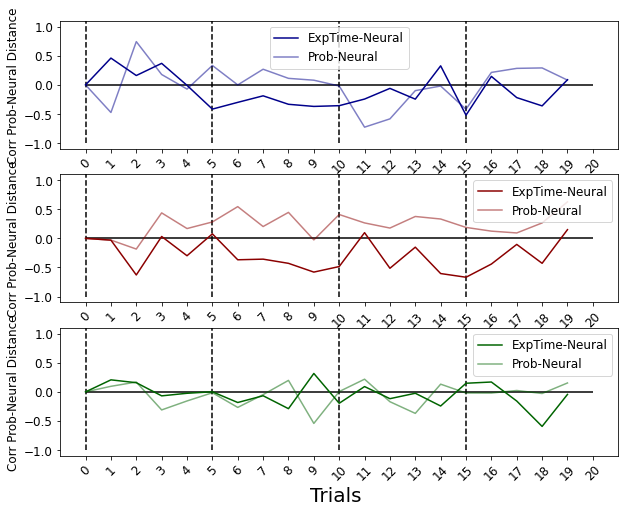

In [46]:
random_mean_occ2= correlation_random2
stable_mean_occ2 = correlation_stable2
overlapping_mean_occ2 = correlation_overlapping2

figure, axes = plt.subplots(3,1)

time = np.arange(0,20)
axes[0].plot(time,random_mean_occ1[time],'darkblue')
axes[0].plot(time,random_mean_occ2[time],'darkblue',alpha = 0.5)

axes[1].plot(time,stable_mean_occ1[time],'darkred')
axes[1].plot(time,stable_mean_occ2[time],'darkred',alpha = 0.5)

axes[2].plot(time,overlapping_mean_occ1[time],'darkgreen')
axes[2].plot(time,overlapping_mean_occ2[time],'darkgreen',alpha = 0.5)

for i in range(3):
    axes[i].set_ylim([-1.1,1.1])
    axes[i].set_ylabel('Corr Prob-Neural Distance',fontsize = 12)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].set_xticks(np.arange(0,21))

    axes[i].tick_params(axis='y', labelsize=12)  
    for tick in axes[i].get_xticklabels():
        tick.set_rotation(45)
    axes[i].hlines(0,0,20,color = 'k')  
    axes[i].legend(['ExpTime-Neural','Prob-Neural'], fontsize = 12)
    axes[i].vlines([0,5,10,15], -1, 3, colors='k', linestyles='dashed')

axes[2].set_xlabel('Trials ',fontsize = 20)

figure.set_size_inches([10,8])
figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_exp_probability_neural_mix_category.png')

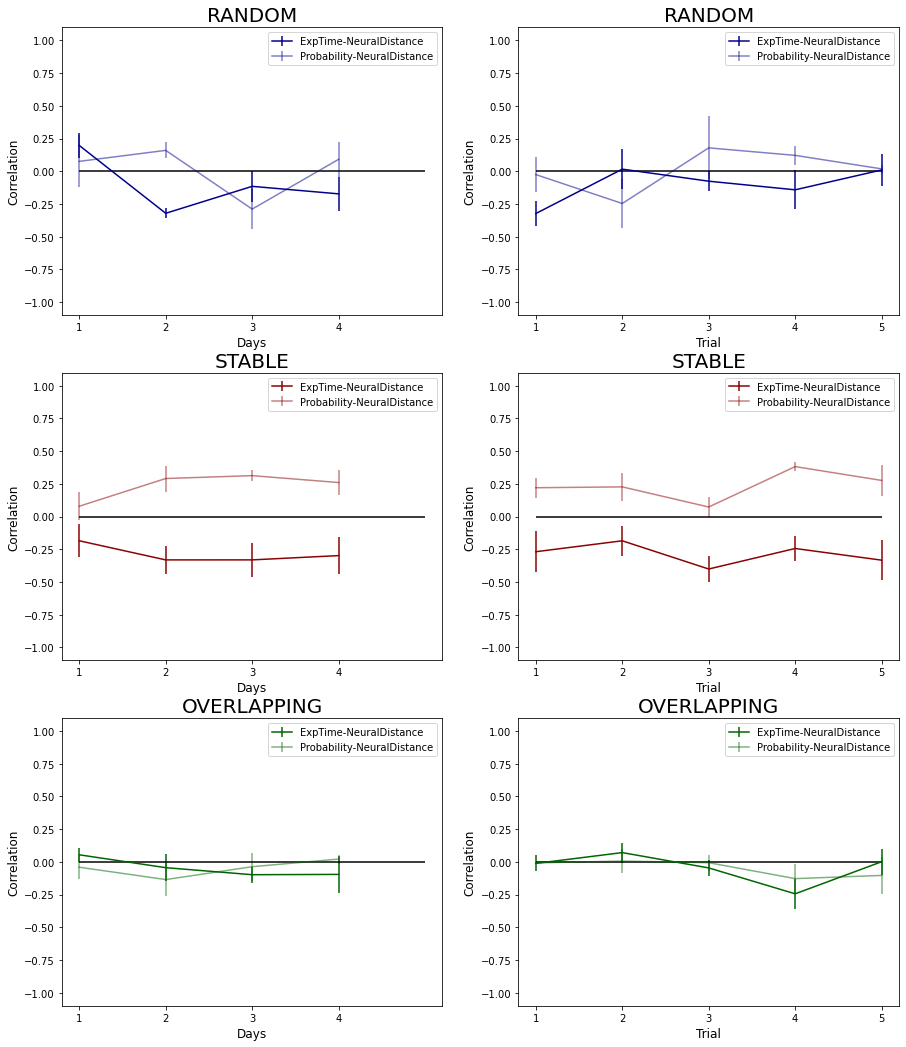

In [47]:
figure, axes = plt.subplots(3,2)
color_random = ['darkblue','blue','royalblue']
color_stable = ['darkred','red','tomato']
color_overlapping = ['darkgreen','limegreen','y','cyan']
titles = ['RANDOM','STABLE','OVERLAPPING']

trials = np.arange(0,5)
axes[0,1].errorbar(trials,np.nanmean(random1,axis = 0),np.nanstd(random1,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0,1].errorbar(trials,np.nanmean(random2,axis = 0),np.nanstd(random2,axis = 0)/np.sqrt(random.shape[0]),color = color_random[0],alpha = 0.5)
axes[1,1].errorbar(trials,np.nanmean(stable1,axis = 0),np.nanstd(stable1,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1,1].errorbar(trials,np.nanmean(stable2,axis = 0),np.nanstd(stable2,axis = 0)/np.sqrt(stable.shape[0]),color = color_stable[0],alpha = 0.5)
axes[2,1].errorbar(trials,np.nanmean(overlapping1,axis = 0),np.nanstd(overlapping1,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])
axes[2,1].errorbar(trials,np.nanmean(overlapping2,axis = 0),np.nanstd(overlapping2,axis = 0)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0],alpha = 0.5)

trials = np.arange(0,4)
axes[0,0].errorbar(trials,np.nanmean(random1,axis = 1),np.nanstd(random1,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0])
axes[0,0].errorbar(trials,np.nanmean(random2,axis = 1),np.nanstd(random2,axis = 1)/np.sqrt(random.shape[0]),color = color_random[0],alpha = 0.5)
axes[1,0].errorbar(trials,np.nanmean(stable1,axis = 1),np.nanstd(stable1,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0])
axes[1,0].errorbar(trials,np.nanmean(stable2,axis = 1),np.nanstd(stable2,axis = 1)/np.sqrt(stable.shape[0]),color = color_stable[0],alpha = 0.5)
axes[2,0].errorbar(trials,np.nanmean(overlapping1,axis = 1),np.nanstd(overlapping1,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0])
axes[2,0].errorbar(trials,np.nanmean(overlapping2,axis = 1),np.nanstd(overlapping2,axis = 1)/np.sqrt(overlapping.shape[0]), color = color_overlapping[0],alpha = 0.5)

for i in range(3):
    for j in range(2):
        axes[i,j].set_ylim([-1.1,1.1])
        
for i in range(3):
    axes[2,j].set_xlabel('Trials ',fontsize = 20)
    for j in range(2):
        axes[i,j].set_title(titles[i],fontsize = 20)

trials_comparison_pos = [0,1,2,3,4]
tick_label = ['1','2','3','4','5']
for j in range(3):
    axes[j,1].set_xticks(trials_comparison_pos)
    axes[j,1].set_xlabel('Trial', fontsize = 12)
    axes[j,1].set_ylabel('Correlation', fontsize = 12)
    axes[j,1].set_xticklabels(tick_label)
    axes[j,1].legend(['ExpTime-NeuralDistance','Probability-NeuralDistance'])
    axes[j,1].hlines(0,0,4,color = 'k')  

trials_comparison_pos = [0,1,2,3]
tick_label = ['1','2','3','4']
for j in range(3):
    axes[j,0].set_xticks(trials_comparison_pos)
    axes[j,0].set_xlabel('Days', fontsize = 12)
    axes[j,0].set_ylabel('Correlation', fontsize = 12)
    axes[j,0].set_xticklabels(tick_label)
    axes[j,0].legend(['ExpTime-NeuralDistance','Probability-NeuralDistance'])
    axes[j,0].hlines(0,0,4,color = 'k')  
    
figure.set_size_inches([15,18])

figure.patch.set_facecolor('white')
figure.savefig(figure_path + 'correlation_exp_prob_neural_all_categories_day_trials.png')